In [31]:
import scvelo as scv
import pandas as pd
import matplotlib.pyplot as plt
# Pancreas
import scanpy
adata =scanpy.read ('/Users/wanglab/Documents/ShengyuLi/Velocity/data/raw_data/endocrinogenesis_day15.h5ad')

In [32]:
S_score=adata.obs['S_score'].reset_index(drop=True)
G2M_score=adata.obs['G2M_score'].reset_index(drop=True)

In [33]:
umap=pd.read_csv('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/alpha_beta_gamma_umap/alpha_beta_gamma_02_using/alpha_beta_gamma_umap50.csv')

In [34]:
alpha_umap_S_score=pd.concat([umap,S_score],axis=1)
alpha_umap_S_score

,umap1,umap2,clusters,S_score
0,7.435844,10.801719,Pre-endocrine,-0.224902
1,13.602750,-3.233034,Ductal,-0.014707
2,5.527931,13.530675,Alpha,-0.171255
3,8.213707,-5.381517,Ductal,0.599244
4,12.556508,7.032287,Ngn3 high EP,-0.179981
...,...,...,...,...
3691,7.717154,10.469352,Pre-endocrine,-0.235896
3692,14.280929,4.381936,Ngn3 high EP,0.279374
3693,11.113872,-4.856903,Ductal,-0.045692
3694,3.947720,15.276198,Alpha,-0.240576


In [35]:
alpha_umap_G2M_score=pd.concat([umap,G2M_score],axis=1)
alpha_umap_G2M_score

,umap1,umap2,clusters,G2M_score
0,7.435844,10.801719,Pre-endocrine,-0.252071
1,13.602750,-3.233034,Ductal,-0.232610
2,5.527931,13.530675,Alpha,-0.286834
3,8.213707,-5.381517,Ductal,0.191243
4,12.556508,7.032287,Ngn3 high EP,-0.126030
...,...,...,...,...
3691,7.717154,10.469352,Pre-endocrine,-0.266101
3692,14.280929,4.381936,Ngn3 high EP,-0.204047
3693,11.113872,-4.856903,Ductal,-0.208907
3694,3.947720,15.276198,Alpha,-0.206865


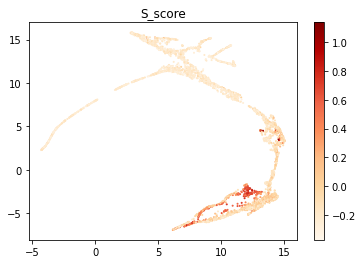

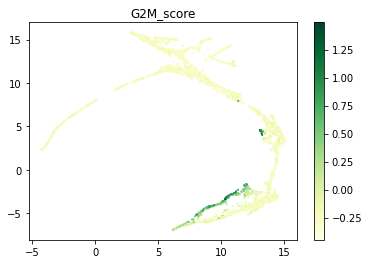

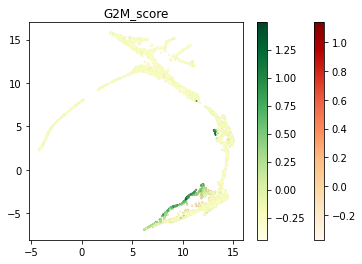

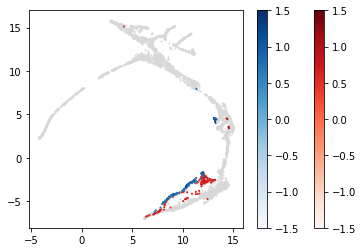

In [149]:
pointsize=1
alpha=1

plt.figure()
plt.scatter(alpha_umap_S_score.umap1,alpha_umap_S_score.umap2,c=alpha_umap_S_score.S_score,s=pointsize,alpha=alpha,cmap='OrRd')
plt.title('S_score')
plt.colorbar()
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/umap_S_G2M_score/S_score.pdf')

plt.figure()
plt.scatter(alpha_umap_G2M_score.umap1,alpha_umap_G2M_score.umap2,c=alpha_umap_G2M_score.G2M_score,s=pointsize,cmap='YlGn',alpha=alpha)
plt.title('G2M_score')
plt.colorbar()
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/umap_S_G2M_score/G2M_score.pdf')


plt.figure()
plt.scatter(alpha_umap_S_score.umap1,alpha_umap_S_score.umap2,c=alpha_umap_S_score.S_score,s=pointsize,alpha=alpha,cmap='OrRd')
plt.title('S_score')
plt.colorbar()
plt.scatter(alpha_umap_G2M_score.umap1,alpha_umap_G2M_score.umap2,c=alpha_umap_G2M_score.G2M_score,s=pointsize,cmap='YlGn',alpha=alpha)
plt.title('G2M_score')
plt.colorbar()
plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/umap_S_G2M_score/S_G2M_score.pdf')


plt.figure()
# sum_col=pd.DataFrame({"sum_S_G2M":(alpha_umap_S_score.S_score-alpha_umap_G2M_score.G2M_score)})
# sum_col.loc[((sum_col['sum_S_G2M'] <0.2) & (sum_col['sum_S_G2M'] > -0.4)), 'sum_S_G2M'] = 0


plt.scatter(alpha_umap_S_score.umap1,alpha_umap_S_score.umap2,s=pointsize,alpha=alpha,c='#D8D8D8')
# plt.colorbar()




filtered_S_score=alpha_umap_S_score[alpha_umap_S_score.S_score > alpha_umap_S_score.S_score.quantile(0.95)]


plt.scatter(filtered_S_score.umap1,filtered_S_score.umap2,c=filtered_S_score.S_score,s=pointsize,alpha=alpha,cmap='Reds',vmin=-1.5,vmax=1.5)
plt.colorbar()

filtered_G2M_score=alpha_umap_G2M_score[alpha_umap_G2M_score.G2M_score > alpha_umap_G2M_score.G2M_score.quantile(0.95)]


plt.scatter(filtered_G2M_score.umap1,filtered_G2M_score.umap2,c=filtered_G2M_score.G2M_score,s=pointsize,alpha=alpha,cmap='Blues',vmin=-1.5,vmax=1.5)
plt.colorbar()

#plt.scatter(alpha_umap_S_score.umap1,alpha_umap_S_score.umap2,c=sum_col.sum_S_G2M,s=pointsize,alpha=alpha,cmap='RdBu',vmin=-1.5,vmax=1.5)
#plt.scatter(alpha_umap_S_score[sum_col.sum_S_G2M==0]["umap1"],alpha_umap_S_score[sum_col.sum_S_G2M==0]["umap2"],c=sum_col[sum_col.sum_S_G2M==0]['sum'],s=pointsize,alpha=alpha,cmap='cool')
#filtered_S_score
# plt.title('S_score G2M_score')
# plt.colorbar()

plt.savefig('/Users/wanglab/Documents/ShengyuLi/Velocity/data/pancreas/velocity_result/2000_smooth/velocity_result_all_genes/umap_S_G2M_score/S_G2M_score.pdf')




In [142]:
filtered_G2M_score

,umap1,umap2,clusters,G2M_score
0,7.435844,10.801719,Pre-endocrine,-0.252071
1,13.602750,-3.233034,Ductal,-0.232610
2,5.527931,13.530675,Alpha,-0.286834
3,8.213707,-5.381517,Ductal,0.191243
4,12.556508,7.032287,Ngn3 high EP,-0.126030
...,...,...,...,...
3691,7.717154,10.469352,Pre-endocrine,-0.266101
3692,14.280929,4.381936,Ngn3 high EP,-0.204047
3693,11.113872,-4.856903,Ductal,-0.208907
3694,3.947720,15.276198,Alpha,-0.206865


In [99]:
filtered_G2M_score

,umap1,umap2,clusters,G2M_score
0,7.435844,10.801719,Pre-endocrine,-0.252071
1,13.602750,-3.233034,Ductal,-0.232610
2,5.527931,13.530675,Alpha,-0.286834
3,8.213707,-5.381517,Ductal,0.191243
4,12.556508,7.032287,Ngn3 high EP,-0.126030
...,...,...,...,...
3691,7.717154,10.469352,Pre-endocrine,-0.266101
3692,14.280929,4.381936,Ngn3 high EP,-0.204047
3693,11.113872,-4.856903,Ductal,-0.208907
3694,3.947720,15.276198,Alpha,-0.206865


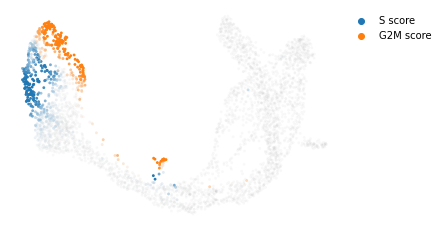

In [78]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])


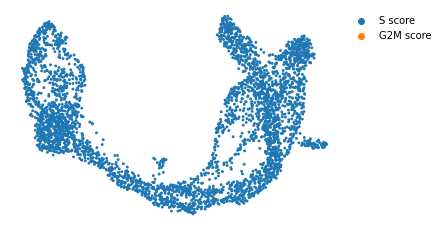

In [79]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[95, 5])



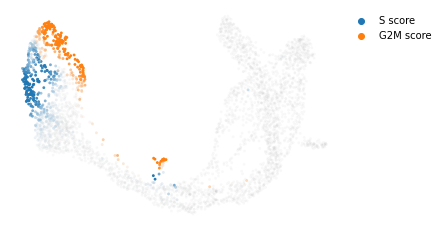

In [100]:
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])



In [152]:
adata_bkup=adata.copy()

In [161]:
# scanpy.tl.leiden(adata)



In [159]:
adata

AnnData object with n_obs × n_vars = 3696 × 27998
    obs: 'clusters_coarse', 'clusters', 'S_score', 'G2M_score', 'clusters_gradients'
    var: 'highly_variable_genes'
    uns: 'clusters_coarse_colors', 'clusters_colors', 'day_colors', 'neighbors', 'pca', 'clusters_gradients_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    layers: 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'